In [1]:
# -*- coding: utf-8 -*-

<br>
       Cloud Radar System (CRS) Reflectivity and Doppler Velocity Quick View<br>
<br>
       Decription: The Cloud Radar System (CRS) is a 94 GHz, W-band polarimetric Doppler radar <br>
       built to operate onboard the NASA ER-2 high-altitude research aircraft. CRS was used to <br>
       capture high-resolution profiles of reflectivity and Doppler velocity from an altitude <br>
       of approximately 20 km. This Python script enables users to generate time-height plots of <br>
       the measured CRS radar reflectivity and Doppler velocity for the IMPACTS, GOES-R PLT, <br>
       OLYMPEX, and IPHEX CRS datasets archived by the GHRC DAAC.<br>
       <br>
       Note: The CRS data files are available for a variety of flight periods. Some files contain <br>
       long periods of flight data that can use large amounts of memory on your computer when trying <br>
       to plot the data using this data recipe code. If the code produces a memory error, try plotting <br>
       a smaller subset time period that can be managed by your computer’s memory system.<br>
<br>
       Authors: Essence Raphael and Yuling Wu <br>
       Information and Technology Systems Center (ITSC)<br>
       University of Alabama in Huntsville<br>
       <br>
       Last Edit Date: 30 August 2021<br>
<br>
Import Python packages and modules

test_files/crs/
Select the CRS campaign dataset you would like to plot from the list below.
Campaign #1: impacts
Campaign #2: goesrplt
Campaign #3: olympex
Campaign #4: iphex
The impacts campaign is selected
from impact ${dataDir}
Flight Dates:
2020-01-25
Flight date 2020-01-25 is selected.
Flight time: 18:19:54 UTC 2020-01-25 - 00:32:01 UTC 2020-01-26
Fig.0 is done for Ref


/home/davis_dev/anaconda3/envs/fresh/lib/python3.8/site-packages/matplotlib/contour.py:1491: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/davis_dev/anaconda3/envs/fresh/lib/python3.8/site-packages/matplotlib/contour.py:1492: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


Fig.1 is done for DopV


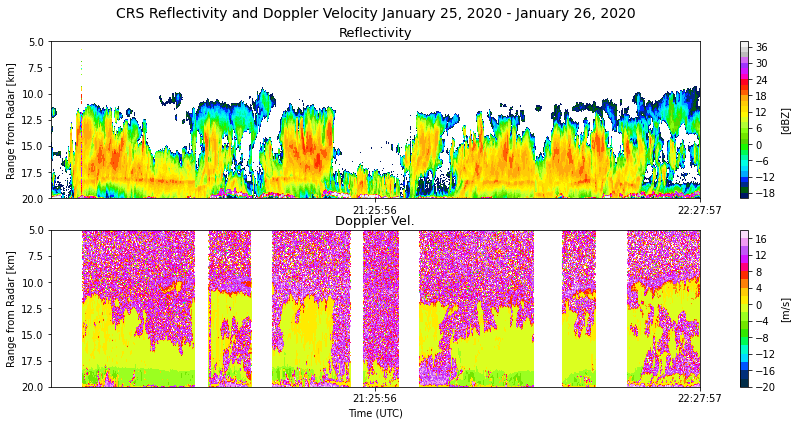

Image saved to  test_files/crs/IMPACTS_20200125T181954_20200126T003201.png

Select the CRS campaign dataset you would like to plot from the list below.
Campaign #1: impacts
Campaign #2: goesrplt
Campaign #3: olympex
Campaign #4: iphex


SystemExit: User selected 'quit'

/home/davis_dev/anaconda3/envs/fresh/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3406: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [2]:
import xarray as xr
import h5py
import os,sys
from datetime import datetime, timedelta 

#Import functions from CRS_Recipe_Functions.py file

from ipynb.fs.full.CRS_Recipe_Functions import CRSsubset_goesrplt, CRSsubset, plot_CRS2D, SAVEsubset, select_time_iphex, select_flight_goesrplt, CRSsubset_impacts
from ipynb.fs.full.CRS_Recipe_Functions import select_campaign, select_flight_olympex, select_flight_iphex, select_time_olympex, select_flight_impacts, select_time_impacts

# Set Path where CRS raw data are stored locally. It can be changed by passing
# a different path as an argument to the main() function in the command prompt

file_path = 'test_files/crs/'

def main(file_path):

    dataDir = os.path.join(file_path,'')
    print(dataDir)
    
    while True:
        # ********************************************************
        # The "select_campaign()" function used to select the CRS field campaign dataset the user 
        # would like to plot based on the files available on their computer 
        # ********************************************************
        campaign_name = select_campaign()
        
        # Once the field campaign CRS dataset has been selected by the user, the code will identify which dataset has been selected
        # and use the block of code designated to read and plot that particular dataset
        
        # If the IMPACTS CRS dataaset has been selected, the IMPACTS CRS dataset files are selected from the data directory
        # specified by the user at the beginning of the script using the "select_flight_impacts()" function.
        # The "select_time_impacts()" function is used to select which flight period the user would like to plot from among the
        # data set files on the user's computer 
        if campaign_name == 'impacts':
            date_files= select_flight_impacts(dataDir) #<--Selected IMPACTS CRS data files based on date 
            
            #Check whether 'None' was returned if no impacts files were found in the directory. Returns to the
            #campaign selection step if 'None'. Continues through the code if files were found.
            if date_files==None:
                continue
            else: pass
            fileCRS = date_files[0] #<--File path for the selected file 
            
        # ***************************************
        # Access CRS data of selected file
        # ***************************************
            t0 = datetime.fromisoformat('1970-01-01T00:00:00') #<--Epoch time used to convert time field in IMPACTS CRS files
            
            # **************************
            # Selected IMPACTS CRS HDF5 data set file is opened and the exact start and end times are extracted and
            # displayed to the user for subset selection later in the code
            # ***************************
             
            with h5py.File(fileCRS, 'r') as ds:
                st =(t0+timedelta(seconds=float(ds['Time']['Data']['TimeUTC'][0])))    #<--starting time in (hr,min,sec) UTC
                et =(t0+timedelta(seconds=float(ds['Time']['Data']['TimeUTC'][-1])))   #<--ending time in (hr,min,sec) UTC
                print("Flight time: {} UTC {} - {} UTC {}".format(st.strftime("%H:%M:%S"),st.strftime("%Y-%m-%d"),et.strftime("%H:%M:%S"),et.strftime("%Y-%m-%d"))) #<--Print flight period
                
                while True:
            
                    #************************************************************************
                    #---subset selection (can take whole set)
                    # The "CRSsubset_impacts()" function is used to subset the time period plotted from the CRS data file
                    # User can explicitly add subset dates/times into the function in string format; default for t1,d1,t2, and d2 is None and the function will ask user for input
                    # (t1,t2) in 'hh:mm:ss' and (d1,d2) in 'YYYY-MM-DD'
                    #************************************************************************
                    cs=CRSsubset_impacts(ds,t0,t1=None, d1=None, t2=None, d2=None) #<--Subset dataset created
                                            
                    if(not cs): break
            
                    if len(cs)>0:
                        #*************************************************************
                        # Plot 2-D image of CRS reflectivity and Doppler velocity data
                        # The time, height (range from aircraft), reflectivity, and Doppler velocity fields are extracted from
                        # each CRS data file, and input into the "plot_CRS2D()" function that will generate the 2-D image
                        #*************************************************************
                        timeCRS  = ds['Time']['Data']['TimeUTC'][:]  #<--seconds since epoch
                        timeCRS=[(t0+timedelta(seconds=float(s))) for s in timeCRS] #<--Convert timeCRS from seconds since epoch to date/time object
                        extCRS = ds['Products']['Information']['Range'][:]/1000 #<--range from radar/aircraft in [km]  
                        Ref = ds['Products']['Data']['dBZe'][:] #<--radar reflectivity in [dBZ]
                        DopV = ds['Products']['Data']['Velocity_corrected'][:]#<--Doppler velecity after correction [m/s]
                        datap = {'Ref':[a for a,b in zip(Ref, timeCRS) if b in cs], 'DopV':[a for a,b in zip(DopV, timeCRS) if b in cs]} #<--Dictionary containing Ref and DopV  
                        times = [x for x in timeCRS if x in cs] #<--Select the times from full timeCRS array that are within the subset indicated by the user
                        #ref, dopv, times = list(zip(*filter(lambda x: x[2] in cs, zip(Ref, DopV, timeCRS))))
                        #datap = {'Ref': ref,'DopV': dopv}  # <--Dictionary containing Ref and DopV
                        plot_start = timeCRS[0] #<--Datetime object for plot start
                        plot_end = timeCRS[-1] #<--Datetime object for plot end 
                        fig=plot_CRS2D(datap,times,extCRS,plot_start,plot_end,reverseZ=True) #<--Create the 2-D plot of CRS reflectivity & Doppler velocity
            
                        #*************************************************************
                        # User can select whether to save the generated plot
                        # The image start and end time are retrieved from the full period or subset to be used in the "SAVEsubset()"
                        # function to name the saved image file
                        # The "SAVEsubset()" subset function is used to save the image file to the directory the user specifies at the beginning of the script
                        # or in the main() function when the script was run
                        #*************************************************************
                        img_start=plot_start.strftime("%Y%m%d"+ "T" + "%H%M%S") #<--Retrieve image start time and format to 'YYYYMMDDThhmmss' format
                        img_end=plot_end.strftime("%Y%m%d"+ "T" + "%H%M%S") #<--Retrieve image end time and format to 'YYYYMMDDThhmmss' format
                        SAVEsubset(cs,fig,fileCRS,dataDir.split('/')[-1],img_start,img_end) #<--Subset saved or not saved based on user yes/no input ('y' or 'n')
                        break
        
        # If the GOES-R PLT CRS dataaset has been selected, the GOES-R PLT CRS dataset files are selected from the data directory
        # specified by the user at the beginning of the script using the "select_flight_goesrplt()" function
        # The function also allows the user to select which flight period they would like to plot from among the
        # data set files on the user's computer 
        elif campaign_name == 'goesrplt':
            fname,ss=select_flight_goesrplt(dataDir) #<--Selected GOES-R PLT CRS data files based on date/time and the date string
            
            #Check whether 'None' was returned if no goesrplt files were found in the directory. Returns to the
            #campaign selection step if 'None'. Continues through the code if files were found.
            if fname==None:
                continue
            else: pass
            
            fileCRS = os.path.join(dataDir, fname) #<--File path for the selected file   
        
        # ***************************************
        # Access CRS data of selected file
        # ***************************************
            t0=datetime.strptime(ss,"%Y%m%d") #<--Base date from selected flight period used to convert time field in GOES-R PLT CRS files
            
            # *************************
            # Selected GOES-R PLT CRS netCDF-3 data set file is opened and the exact start and end times are extracted and
            # displayed to the user for subset selection later in the code
            # *************************
            with xr.open_dataset(fileCRS,decode_cf=False) as ds:
                st =(t0+timedelta(hours=float(ds['time'].values[0]))).time()    #<--starting time in (hr,min,sec)UTC
                et =(t0+timedelta(hours=float(ds['time'].values[-1]))).time()   #<--ending time in (hr,min,sec)UTC
                print("Flight time: {}-{} UTC, {}".format(st,et,t0.strftime("%Y-%m-%d"))) #<--Print flight period
                
                while True:
            
                    #******************************************************************
                    #---subset selection (can take whole set)
                    # The "CRSsubset_goesrplt()" function is used to subset the time period plotted from the CRS data file
                    # User can explicitly add subset dates/times into the function in string format; default for t1 and t2 is None and the function will ask user for input
                    # (t1,t2) in 'hh:mm:ss'  
                    #******************************************************************
                    cs=CRSsubset_goesrplt(ds,t1=None,t2=None) #<--Subset dataset created
                    
                    if(not cs): break
            
                    if len(cs.time>0):
                        #*************************************************************
                        # Plot 2-D image of CRS reflectivity and Doppler velocity data
                        # The time, height (range from aircraft), reflectivity, and Doppler velocity fields are extracted from
                        # each CRS data file, and input into the "plot_CRS2D()" function that will generate the 2-D image
                        #*************************************************************
                        extCRS = cs['range'].values/1000 #<--range from radar/aircraft in [km]
                        hrCRS  = cs['time'].values       #<--hours in UTC
                        datap  ={'Ref':cs['ref'].values, #<--radar reflectivity in [dBZ]
                                'DopV':cs['dop'].values} #<--Doppler velecity after correction [m/s]
                        times=[(t0+timedelta(hours=float(h))) for h in hrCRS] #<---convert hours to Datetime objects
                        plot_start = (t0+timedelta(hours=float(hrCRS[0]))) #<--Datetime object for plot start
                        plot_end = (t0+timedelta(hours=float(hrCRS[-1]))) #<--Datetime object for plot end 
                        fig=plot_CRS2D(datap,times,extCRS,plot_start,plot_end,reverseZ=True) #<--Create the 2-D plot of CRS reflectivity & Doppler velocity
            
                        #*************************************************************
                        # User can select whether to save the generated plot
                        # The image start and end time are retrieved from the full period or subset to be used in the "SAVEsubset()"
                        # function to name the saved image file
                        # The "SAVEsubset()" subset function is used to save the image file to the directory the user specifies at the beginning of the script
                        # or in the main() function when the script was run
                        #*************************************************************
                        img_start=plot_start.strftime("%Y%m%d"+ "T" + "%H%M%S") #<--Retrieve image start time and format to 'YYYYMMDDThhmmss' format
                        img_end=plot_end.strftime("%Y%m%d"+ "T" + "%H%M%S") #<--Retrieve image end time and format to 'YYYYMMDDThhmmss' format
                        SAVEsubset(cs,fig,fname,dataDir,img_start,img_end) #<--Subset saved or not saved based on user yes/no input ('y' or 'n')
                        break       
        
        # If the OLYMPEX CRS dataaset has been selected, the OLYMPEX CRS dataset files are selected from the data directory
        # specified by the user at the beginning of the script using the "select_flight_olympex()" function.
        # The "select_time_olympex()" function is used to select which flight period the user would like to plot from among the
        # data set files on the user's computer 
        elif campaign_name == 'olympex':
            date_files,ss= select_flight_olympex(dataDir) #<--Selected OLYMPEX CRS data files based on date and the date string
            
            #Check whether 'None' was returned if no olympex files were found in the directory. Returns to the
            #campaign selection step if 'None'. Continues through the code if files were found.
            if date_files==None:
                continue
            else: pass
            
            time_file = select_time_olympex(date_files) #<--File selected by user based on flight time period
            fileCRS = os.path.join(dataDir, time_file) #<--File path for the selected file 
        
        # ***************************************
        # Access CRS data of selected file
        # ***************************************
            t0=datetime.strptime(ss,"%Y%m%d") #<--Base date from selected flight period used to convert time field in OLYMPEX CRS files
            
            # *************************
            # Selected OLYMPEX CRS netCDF-3 data set file is opened and the exact start and end times are extracted and
            # displayed to the user for subset selection later in the code
            # *************************
            with xr.open_dataset(fileCRS,decode_cf=False) as ds:
                st =(t0+timedelta(hours=float(ds['timed'].values[0]))).time()    #<--starting time in (hr,min,sec)UTC
                et =(t0+timedelta(hours=float(ds['timed'].values[-1]))).time()   #<--ending time in (hr,min,sec)UTC
                print("Flight time: {}-{} UTC, {}".format(st,et,t0.strftime("%Y-%m-%d"))) #<--Print flight period
                
                while True:
            
                    #******************************************************************
                    #---subset selection (can take whole set)
                    # The "CRSsubset()" function is used to subset the time period plotted from the CRS data file
                    # User can explicitly add subset dates/times into the function in string format; default for t1 and t2 is None and the function will ask user for input
                    # (t1,t2) in 'hh:mm:ss'  
                    #******************************************************************
                    cs=CRSsubset(ds,t1=None,t2=None) #<--Subset dataset created  
                    
                    if(not cs): break
            
                    if len(cs.timed>0):
                        #*************************************************************
                        # Plot 2-D image of CRS reflectivity and Doppler velocity data
                        # The time, height (range from aircraft), reflectivity, and Doppler velocity fields are extracted from
                        # each CRS data file, and input into the "plot_CRS2D()" function that will generate the 2-D image
                        #*************************************************************
                        extCRS = cs['range'].values/1000 #<--range from radar/aircraft in [km]
                        hrCRS  = cs['timed'].values       #<--hours in UTC
                        datap  ={'Ref':cs['zku'].values, #<--radar reflectivity in [dBZ]
                                'DopV':cs['dopcorr'].values} #<--Doppler velecity after correction [m/s]
                        times=[(t0+timedelta(hours=float(h))) for h in hrCRS] #<---convert hours to Datetime objects
                        plot_start = (t0+timedelta(hours=float(hrCRS[0]))) #<--Datetime object for plot start
                        plot_end = (t0+timedelta(hours=float(hrCRS[-1]))) #<--Datetime object for plot end 
                        fig=plot_CRS2D(datap,times,extCRS,plot_start,plot_end,reverseZ=True) #<--Create the 2-D plot of CRS reflectivity & Doppler velocity
            
                        #*************************************************************
                        # User can select whether to save the generated plot
                        # The image start and end time are retrieved from the full period or subset to be used in the "SAVEsubset()"
                        # function to name the saved image file
                        # The "SAVEsubset()" subset function is used to save the image file to the directory the user specifies at the beginning of the script
                        # or in the main() function when the script was run
                        #*************************************************************
                        img_start=plot_start.strftime("%Y%m%d"+ "T" + "%H%M%S") #<--Retrieve image start time and format to 'YYYYMMDDThhmmss' format
                        img_end=plot_end.strftime("%Y%m%d"+ "T" + "%H%M%S") #<--Retrieve image end time and format to 'YYYYMMDDThhmmss' format
                        SAVEsubset(cs,fig,time_file,dataDir,img_start,img_end) #<--Subset saved or not saved based on user yes/no input ('y' or 'n')
                        break
        
        # If the IPHEX CRS dataaset has been selected, the OLYMPEX CRS dataset files are selected from the data directory
        # specified by the user at the beginning of the script using the "select_flight_iphex()" function.
        # The "select_time_iphex()" function is used to select which flight period the user would like to plot from among the
        # data set files on the user's computer   
        elif campaign_name == 'iphex':
            date_files,ss= select_flight_iphex(dataDir) #<--Selected IPHEX CRS data files based on date and the date string
            
            #Check whether 'None' was returned if no iphex files were found in the directory. Returns to the
            #campaign selection step if 'None'. Continues through the code if files were found.
            if date_files==None:
                continue
            else: pass
            
            time_file = select_time_iphex(date_files) #<--File selected by user based on flight time period
            fileCRS = os.path.join(dataDir, time_file) #<--File path for the selected file 
        
        # ***************************************
        # Access CRS data of selected file
        # ***************************************    
            t0=datetime.strptime(ss,"%Y%m%d") #<--Base date from selected flight period used to convert time field in IPHEX CRS files
            
            # *************************
            # Selected IPHEX CRS netCDF-3 data set file is opened and the exact start and end times are extracted and
            # displayed to the user for subset selection later in the code
            # *************************
            with xr.open_dataset(fileCRS,decode_cf=False) as ds:
                st =(t0+timedelta(hours=float(ds['timed'].values[0]))).time()    #<--starting time in (hr,min,sec)UTC
                et =(t0+timedelta(hours=float(ds['timed'].values[-1]))).time()   #<--ending time in (hr,min,sec)UTC
                print("Flight time: {}-{} UTC, {}".format(st,et,t0.strftime("%Y-%m-%d"))) #<--Print flight period
                
                while True:
            
                    #******************************************************************
                    #---subset selection (can take whole set)
                    # The "CRSsubset()" function is used to subset the time period plotted from the CRS data file
                    # User can explicitly add subset dates/times into the function in string format; default for t1 and t2 is None and the function will ask user for input
                    # (t1,t2) in 'hh:mm:ss' 
                    #******************************************************************
                    cs=CRSsubset(ds,t1=None,t2=None) #<--Subset dataset created 
                    
                    if(not cs): break
            
                    if len(cs.timed>0):
                        #*************************************************************
                        # Plot 2-D image of CRS reflectivity and Doppler velocity data
                        # The time, height (range from aircraft), reflectivity, and Doppler velocity fields are extracted from
                        # each CRS data file, and input into the "plot_CRS2D()" function that will generate the 2-D image
                        #*************************************************************
                        extCRS = cs['range'].values/1000 #<--range from radar/aircraft in [km]
                        hrCRS  = cs['timed'].values       #<--hours in UTC
                        datap  ={'Ref':cs['zku'].values, #<--radar reflectivity in [dBZ]
                                'DopV':cs['dopcorr'].values} #<--Doppler velecity after correction [m/s]
                        times=[(t0+timedelta(hours=float(h))) for h in hrCRS] #<---convert hours to Datetime objects
                        plot_start = (t0+timedelta(hours=float(hrCRS[0]))) #<--Datetime object for plot start
                        plot_end = (t0+timedelta(hours=float(hrCRS[-1]))) #<--Datetime object for plot end 
                        fig=plot_CRS2D(datap,times,extCRS,plot_start,plot_end,reverseZ=True) #<--Create the 2-D plot of CRS reflectivity & Doppler velocity
            
                        #*************************************************************
                        # User can select whether to save the generated plot
                        # The image start and end time are retrieved from the full period or subset to be used in the "SAVEsubset()"
                        # function to name the saved image file
                        # The "SAVEsubset()" subset function is used to save the image file to the directory the user specifies at the beginning of the script
                        # or in the main() function when the script was run
                        #*************************************************************
                        img_start=plot_start.strftime("%Y%m%d"+ "T" + "%H%M%S") #<--Retrieve image start time and format to 'YYYYMMDDThhmmss' format
                        img_end=plot_end.strftime("%Y%m%d"+ "T" + "%H%M%S") #<--Retrieve image end time and format to 'YYYYMMDDThhmmss' format
                        SAVEsubset(cs,fig,time_file,dataDir,img_start,img_end) #<--Subset saved or not saved based on user yes/no input ('y' or 'n')
                        break
        
        else:
            None

if __name__ == "__main__":
    main(file_path)